In [1]:
import os
import numpy as np
import efficientnet.tfkeras
from tensorflow.keras.models import load_model

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"

# load model

In [3]:
model_dir ='/media/tohn/SSD/ModelTrainByImages/R2_1/models/B5R2_block5_15AB_1FC_3.h5'
model = load_model(model_dir)
height = width = model.input_shape[1]

In [4]:
# validation
import pandas as pd
base_dir  = '/media/tohn/SSD/Images/Image1/validation/'
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/validationdf_fold1.csv')
validation_dir = os.path.join(base_dir, 'validation')

#Train
train_df = pd.read_csv( '/home/yupaporn/codes/USAI/traindf_fold1.csv')
base_dir0 = '/media/tohn/SSD/Images/Image1/'
os.chdir(base_dir0)
train_dir = os.path.join(base_dir0, 'train')

# Select Data

In [13]:
import pandas as pd
df0 = pd.read_csv (r'/home/yupaporn/codes/USAI/traindf_fold1.csv')
print(df0 .shape)
dataframe = df0[(df0['Path Crop']!='None' )&(df0['Path Crop']!='Nan')]
# a = df01[df01['Case'].between(1, 10)]
# dataframe = df01[df01['Abs Position']!='P8']
print(dataframe.shape)
print('Normal: ',dataframe[dataframe['Class']=='Normal'].shape)
print('Abnormal: ',dataframe[dataframe['Class']=='Abnormal'].shape)
dataframe.head(5)

(4601, 13)
(4601, 13)
Normal:  (3005, 13)
Abnormal:  (1596, 13)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,filename
0,0,34,34,42,P5,P52,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C,7,AB01 P5-2 C042.JPG
1,1,35,35,42,P1,P1,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,7,AB02 P1 C042.JPG
2,2,36,36,42,P2,P2,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,7,AB02 P2 C042.JPG
3,3,37,37,42,P5,P51,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C,7,AB02 P5-1 C042.JPG
4,4,38,38,42,P4,P42,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,7,AB02 P4-2 C042.JPG


In [14]:
batch_size = 64
epochs = 10

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      brightness_range=[0.5,1.5],
      shear_range=0.4,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
        dataframe = dataframe,
        directory = train_dir,
        x_col = 'Path Crop',
        y_col = 'Sub_class',
        target_size = (height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='categorical')

#label
labels = (train_generator.class_indices)
labels = dict((v,k.replace("C","")) for k,v in labels.items())
print(labels)

Found 4601 validated image filenames belonging to 15 classes.
{0: 'AB01', 1: 'AB02', 2: 'AB03', 3: 'AB04', 4: 'AB05', 5: 'AB06', 6: 'AB07', 7: 'AB081', 8: 'AB082', 9: 'AB083', 10: 'AB09', 11: 'AB10', 12: 'AB11', 13: 'AB12', 14: 'Normal'}


# Prediction

In [8]:
from tensorflow.keras.preprocessing import image
from scipy.special import softmax
from statistics import mean 
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    

#     X = x.squeeze()#**
    
    cla_0,cla_1,cla_2,cla_3,cla_4,cla_5,cla_6,cla_7,cla_8,cla_9,cla_10,cla_11,cla_12,cla_13,cla_14 = [], [], [], [], [], [], [], [], [], [], [], [], [], [],[]
    for i in range(0,5): #*******************************Drobout
        re = model(x, training=True)[0].numpy()
        print(re)
        cla_0.append(re[0])
        cla_1.append(re[1])
        cla_2.append(re[2])
        cla_3.append(re[3])
        cla_4.append(re[4])
        cla_5.append(re[5])
        cla_6.append(re[6])
        cla_7.append(re[7])
        cla_8.append(re[8])
        cla_9.append(re[9])
        cla_10.append(re[10])
        cla_11.append(re[11])
        cla_12.append(re[12])
        cla_13.append(re[13])
        cla_14.append(re[14])
    label0,label1,abel2,label3,label4,label5,label6,label7,label8,label9,label10 = mean(cla_0),mean(cla_1),mean(cla_2),mean(cla_3),mean(cla_4),mean(cla_5),mean(cla_6),mean(cla_7),mean(cla_8),mean(cla_9),mean(cla_10)
    label11,label12,label13,label14 = mean(cla_11),mean(cla_12),mean(cla_13),mean(cla_14)
    result = [label0,label1,abel2,label3,label4,label5,label6,label7,label8,label9,label10,label11,label12,label13,label14]
    result = softmax(result)
#     result
    print(result)
    return result



In [17]:
img_path[5]

'/media/tohn/HDD/VISION_dataset/USAI/ABnormal01/2 ABNORMAL/cropped/AB02 P4-1 C042.JPG'

In [16]:
img_path=dataframe['Path Crop'].tolist()[0:10]
predict_image(img_path[5])

[2.3636730e-05 8.6675289e-05 2.4290910e-06 3.5240009e-06 2.8880356e-06
 5.5325913e-06 7.8435132e-06 2.0519590e-06 1.1449482e-05 5.8737633e-06
 8.4262565e-06 2.1854494e-06 1.3349571e-05 4.6030837e-05 9.9977821e-01]
[2.3516462e-07 7.5235391e-07 3.9260804e-08 2.7079533e-08 1.0462556e-08
 4.6737771e-08 4.5933554e-08 3.2342278e-08 1.2349344e-08 2.9936260e-08
 3.3657855e-08 7.6640658e-09 7.1855553e-08 3.9738829e-08 9.9999857e-01]
[1.42781332e-07 4.78141089e-07 2.93517655e-08 3.16821520e-08
 5.59916957e-09 4.62855354e-08 2.48732501e-08 1.68328445e-08
 7.67065078e-09 1.60040923e-08 1.17709371e-08 8.31439806e-09
 1.11150186e-07 2.95444789e-08 9.99999046e-01]
[1.9772595e-07 9.5095186e-07 4.1106610e-08 1.4434237e-08 1.0993688e-08
 3.9297664e-08 2.3123770e-08 2.9071996e-08 1.4680374e-08 2.0104499e-08
 2.3384924e-08 1.0747830e-08 1.2248444e-07 5.0751659e-08 9.9999845e-01]
[3.5490502e-05 8.0203339e-05 3.1310626e-06 5.2429436e-06 3.8546241e-06
 4.1083317e-06 5.1762204e-06 2.6242069e-06 8.0047867e-06 

array([0.05981599, 0.0598173 , 0.05981535, 0.05981538, 0.05981536,
       0.05981538, 0.05981543, 0.05981533, 0.0598155 , 0.05981541,
       0.05981543, 0.05981533, 0.05981556, 0.05981599, 0.16258144],
      dtype=float32)

In [8]:
img_path=dataframe['Path Crop'].tolist()[0:10]
labels[np.argmax(predict_image(img_path[0]))]

'Normal'

In [55]:
img_path[3]

'/media/tohn/HDD/VISION_dataset/USAI/ABnormal01/1 ABNORMAL/cropped/AB01 P4-2 C015.JPG'

In [56]:
img_path[1]

'/media/tohn/HDD/VISION_dataset/USAI/ABnormal01/1 ABNORMAL/cropped/AB01 P1 C015.JPG'

In [57]:
predict_image(img_path[1])

array([0.05981481, 0.05981479, 0.05981478, 0.05981478, 0.05981478,
       0.05981478, 0.05981478, 0.05981478, 0.05981478, 0.05981478,
       0.05981478, 0.05981478, 0.05981478, 0.05981478, 0.16259319],
      dtype=float32)

In [68]:
# sum(predict_image(img_path[3]))

In [67]:
# predict_image(img_path[3])

In [66]:
# predict_image(img_path[0])

In [35]:
#     img = image.load_img(img_path[0], target_size=(height, width))
#     # Convert it to a Numpy array with target shape.
#     x = image.img_to_array(img)
#     # Reshape
#     x = x.reshape((1,) + x.shape)
#     x /= 255.
    

# #     X = x.squeeze()#**
    
#     cla_0,cla_1 = [], []
#     for i in range(0,5): #*******************************Drobout
#         re = model(x, training=True)[0].numpy()
#         print(re)
#         cla_0.append(re[0])
#         cla_1.append(re[1])
#         cla_2.append(re[2])
#         cla_3.append(re[3])
#         cla_4.append(re[4])
#         cla_5.append(re[5])
#         cla_6.append(re[6])
#         cla_7.append(re[7])
#         cla_8.append(re[8])
#         cla_9.append(re[9])
#         cla_10.append(re[10])
#         cla_11.append(re[11])
#         cla_12.append(re[12])
#         cla_13.append(re[13])
#         cla_14.append(re[14])

In [9]:
#Predict
pred_list = list()
prob_list = list()
img_path=dataframe['Path Crop'].tolist()
for i in range(0,len(img_path)):
    print(i)
    pred_list.append(labels[np.argmax(predict_image(img_path[i]))])
    if np.argmax(predict_image(img_path[i])) == 0:
        prob_list.append(predict_image(img_path[i])[0])
    elif np.argmax(predict_image(img_path[i])) == 1:
        prob_list.append(predict_image(img_path[i])[1])
    elif np.argmax(predict_image(img_path[i])) == 2:
        prob_list.append(predict_image(img_path[i])[2])
    elif np.argmax(predict_image(img_path[i])) == 3:
        prob_list.append(predict_image(img_path[i])[3])
    elif np.argmax(predict_image(img_path[i])) == 4:
        prob_list.append(predict_image(img_path[i])[4])
    elif np.argmax(predict_image(img_path[i])) == 5:
        prob_list.append(predict_image(img_path[i])[5])
    elif np.argmax(predict_image(img_path[i])) == 6:
        prob_list.append(predict_image(img_path[i])[6])
    elif np.argmax(predict_image(img_path[i])) == 7:
        prob_list.append(predict_image(img_path[i])[7])
    elif np.argmax(predict_image(img_path[i])) == 8:
        prob_list.append(predict_image(img_path[i])[8])
    elif np.argmax(predict_image(img_path[i])) == 9:
        prob_list.append(predict_image(img_path[i])[9])
    elif np.argmax(predict_image(img_path[i])) == 10:
        prob_list.append(predict_image(img_path[i])[10])
    elif np.argmax(predict_image(img_path[i])) == 11:
        prob_list.append(predict_image(img_path[i])[11])
    elif np.argmax(predict_image(img_path[i])) == 12:
        prob_list.append(predict_image(img_path[i])[12])
    elif np.argmax(predict_image(img_path[i])) == 13:
        prob_list.append(predict_image(img_path[i])[13])
    elif np.argmax(predict_image(img_path[i])) == 14:
        prob_list.append(predict_image(img_path[i])[14])
        
dataframe['category'] = pred_list
dataframe['Prob'] = prob_list

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [10]:
# dataframe = dataframe.iloc[0:10,:]
# dataframe['category'] = pred_list
# dataframe['Prob'] = prob_list

In [ ]:
# from tensorflow.keras.preprocessing import image
# from scipy.special import softmax
# from statistics import mean 
# import numpy as np

# img_path=dataframe['Path Crop'].tolist()
# num = 32
# rank=n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,n16,n17,n18,n19,n20= img_path[0:num], img_path[num:(2*num)],img_path[(2*num):(3*num)],img_path[3*num:4*num],img_path[4*num:5*num],img_path[5*num:6*num],img_path[6*num:7*num],img_path[7*num:8*num],img_path[(8*num):(9*num)],img_path[(9*num):(10*num)],img_path[(10*num):(11*num)],img_path[(11*num):(12*num)],img_path[(12*num):(13*num)],img_path[(13*num):(14*num)],img_path[(14*num):(15*num)],img_path[(15*num):(16*num)],img_path[(16*num):(17*num)],img_path[(17*num):(18*num)],img_path[(18*num):(19*num)],img_path[(19*num):(20*num)],img_path[(20*num):int(len(img_path))]

In [ ]:
# result =list()
# # img_path=dataframe['Path Crop'].tolist()
# # img_path = img_path[0:32]
# for m in range(0,len(rank)):
#     X =list()
#     img_path = rank[m]
#     print(m)
#     for n in range(0,len(img_path)):
#         img = image.load_img(img_path[n], target_size=(height, width))
#         x = image.img_to_array(img)
#         x = x.reshape((1,) + x.shape)
#         x /= 255.
#         X.append(x)
#     X = np.array(X)
#     X = X.squeeze()
#     cla_00,cla_01,cla_10,cla_11,cla_20,cla_21,cla_30,cla_31 ,cla_40,cla_41= [], [], [], [], [], [], [], [], [], []
#     cla_50,cla_51,cla_60,cla_61,cla_70,cla_71,cla_80,cla_81 ,cla_90,cla_91= [], [], [], [], [], [], [], [], [], []
#     cla_100,cla_101,cla_110,cla_111,cla_120,cla_121,cla_130,cla_131 ,cla_140,cla_141= [], [], [], [], [], [], [], [], [], []
#     cla_150,cla_151,cla_160,cla_161,cla_170,cla_171,cla_180,cla_181 ,cla_190,cla_191= [], [], [], [], [], [], [], [], [], []
#     cla_200,cla_201,cla_210,cla_211,cla_220,cla_221,cla_230,cla_231 ,cla_240,cla_241= [], [], [], [], [], [], [], [], [], []
#     cla_250,cla_251,cla_260,cla_261,cla_270,cla_271,cla_280,cla_281 ,cla_290,cla_291= [], [], [], [], [], [], [], [], [], []
#     cla_300,cla_301,cla_310,cla_311 = [],[],[],[]
#     RE = []
#     for i in range(0,20):
#         re = model(X, training=True).numpy()
#         RE.append(re)
#     for i in range(0,len(RE)):
#         #print(i)
#         numdrob = RE[i]
        
#         if len(rank[m]) == 16:
#             for j in range(0,len(numdrob)):
#                 if j ==0:
#                     cla_00.append(numdrob[j][0])
#                     cla_01.append(numdrob[j][1])
#                     cla_02.append(numdrob[j][2])
#                     cla_03.append(numdrob[j][3])
#                     cla_04.append(numdrob[j][4])
#                     cla_05.append(numdrob[j][5])
#                     cla_06.append(numdrob[j][6])
#                     cla_07.append(numdrob[j][7])
#                     cla_08.append(numdrob[j][8])
#                     cla_09.append(numdrob[j][9])
#                     cla_010.append(numdrob[j][10])
#                     cla_011.append(numdrob[j][11])
#                     cla_012.append(numdrob[j][12])
#                     cla_013.append(numdrob[j][13])
#                     cla_014.append(numdrob[j][14])
#                 elif j ==1:
#                     cla_10.append(numdrob[j][0])
#                     cla_11.append(numdrob[j][1])
#                     cla_12.append(numdrob[j][2])
#                     cla_13.append(numdrob[j][3])
#                     cla_14.append(numdrob[j][4])
#                     cla_15.append(numdrob[j][5])
#                     cla_16.append(numdrob[j][6])
#                     cla_17.append(numdrob[j][7])
#                     cla_18.append(numdrob[j][8])
#                     cla_19.append(numdrob[j][9])
#                     cla_110.append(numdrob[j][10])
#                     cla_111.append(numdrob[j][11])
#                     cla_112.append(numdrob[j][12])
#                     cla_113.append(numdrob[j][13])
#                     cla_114.append(numdrob[j][14])
#                 elif j ==2:
#                     cla_20.append(numdrob[j][0])
#                     cla_21.append(numdrob[j][1])
#                     cla_22.append(numdrob[j][2])
#                     cla_23.append(numdrob[j][3])
#                     cla_24.append(numdrob[j][4])
#                     cla_25.append(numdrob[j][5])
#                     cla_26.append(numdrob[j][6])
#                     cla_27.append(numdrob[j][7])
#                     cla_28.append(numdrob[j][8])
#                     cla_29.append(numdrob[j][9])
#                     cla_210.append(numdrob[j][10])
#                     cla_211.append(numdrob[j][11])
#                     cla_212.append(numdrob[j][12])
#                     cla_213.append(numdrob[j][13])
#                     cla_214.append(numdrob[j][14])
#                 elif j ==3:
#                     cla_30.append(numdrob[j][0])
#                     cla_31.append(numdrob[j][1])
#                     cla_32.append(numdrob[j][2])
#                     cla_33.append(numdrob[j][3])
#                     cla_34.append(numdrob[j][4])
#                     cla_35.append(numdrob[j][5])
#                     cla_36.append(numdrob[j][6])
#                     cla_37.append(numdrob[j][7])
#                     cla_38.append(numdrob[j][8])
#                     cla_39.append(numdrob[j][9])
#                     cla_310.append(numdrob[j][10])
#                     cla_311.append(numdrob[j][11])
#                     cla_312.append(numdrob[j][12])
#                     cla_313.append(numdrob[j][13])
#                     cla_314.append(numdrob[j][14])
#                 elif j ==4:
#                     cla_40.append(numdrob[j][0])
#                     cla_41.append(numdrob[j][1])
#                     cla_42.append(numdrob[j][2])
#                     cla_43.append(numdrob[j][3])
#                     cla_44.append(numdrob[j][4])
#                     cla_45.append(numdrob[j][5])
#                     cla_46.append(numdrob[j][6])
#                     cla_47.append(numdrob[j][7])
#                     cla_48.append(numdrob[j][8])
#                     cla_49.append(numdrob[j][9])
#                     cla_410.append(numdrob[j][10])
#                     cla_411.append(numdrob[j][11])
#                     cla_412.append(numdrob[j][12])
#                     cla_413.append(numdrob[j][13])
#                     cla_414.append(numdrob[j][14])
#                 elif j ==5:
#                     cla_50.append(numdrob[j][0])
#                     cla_51.append(numdrob[j][1])
#                     cla_52.append(numdrob[j][2])
#                     cla_53.append(numdrob[j][3])
#                     cla_54.append(numdrob[j][4])
#                     cla_55.append(numdrob[j][5])
#                     cla_56.append(numdrob[j][6])
#                     cla_57.append(numdrob[j][7])
#                     cla_58.append(numdrob[j][8])
#                     cla_59.append(numdrob[j][9])
#                     cla_510.append(numdrob[j][10])
#                     cla_511.append(numdrob[j][11])
#                     cla_512.append(numdrob[j][12])
#                     cla_513.append(numdrob[j][13])
#                     cla_514.append(numdrob[j][14])
#                 elif j ==6:
#                     cla_60.append(numdrob[j][0])
#                     cla_61.append(numdrob[j][1])
#                     cla_62.append(numdrob[j][2])
#                     cla_63.append(numdrob[j][3])
#                     cla_64.append(numdrob[j][4])
#                     cla_65.append(numdrob[j][5])
#                     cla_66.append(numdrob[j][6])
#                     cla_67.append(numdrob[j][7])
#                     cla_68.append(numdrob[j][8])
#                     cla_69.append(numdrob[j][9])
#                     cla_610.append(numdrob[j][10])
#                     cla_611.append(numdrob[j][11])
#                     cla_612.append(numdrob[j][12])
#                     cla_613.append(numdrob[j][13])
#                     cla_614.append(numdrob[j][14])
#                 elif j ==7:
#                     cla_70.append(numdrob[j][0])
#                     cla_71.append(numdrob[j][1])
#                     cla_72.append(numdrob[j][2])
#                     cla_73.append(numdrob[j][3])
#                     cla_74.append(numdrob[j][4])
#                     cla_75.append(numdrob[j][5])
#                     cla_76.append(numdrob[j][6])
#                     cla_77.append(numdrob[j][7])
#                     cla_78.append(numdrob[j][8])
#                     cla_79.append(numdrob[j][9])
#                     cla_710.append(numdrob[j][10])
#                     cla_711.append(numdrob[j][11])
#                     cla_712.append(numdrob[j][12])
#                     cla_713.append(numdrob[j][13])
#                     cla_714.append(numdrob[j][14])
#                 elif j ==8:
#                     cla_80.append(numdrob[j][0])
#                     cla_81.append(numdrob[j][1])
#                     cla_82.append(numdrob[j][2])
#                     cla_83.append(numdrob[j][3])
#                     cla_84.append(numdrob[j][4])
#                     cla_85.append(numdrob[j][5])
#                     cla_86.append(numdrob[j][6])
#                     cla_87.append(numdrob[j][7])
#                     cla_88.append(numdrob[j][8])
#                     cla_89.append(numdrob[j][9])
#                     cla_810.append(numdrob[j][10])
#                     cla_811.append(numdrob[j][11])
#                     cla_812.append(numdrob[j][12])
#                     cla_813.append(numdrob[j][13])
#                     cla_814.append(numdrob[j][14])
#                 elif j ==9:
#                     cla_90.append(numdrob[j][0])
#                     cla_91.append(numdrob[j][1])
#                     cla_92.append(numdrob[j][2])
#                     cla_93.append(numdrob[j][3])
#                     cla_94.append(numdrob[j][4])
#                     cla_95.append(numdrob[j][5])
#                     cla_96.append(numdrob[j][6])
#                     cla_97.append(numdrob[j][7])
#                     cla_98.append(numdrob[j][8])
#                     cla_99.append(numdrob[j][9])
#                     cla_910.append(numdrob[j][10])
#                     cla_911.append(numdrob[j][11])
#                     cla_912.append(numdrob[j][12])
#                     cla_913.append(numdrob[j][13])
#                     cla_914.append(numdrob[j][14])
#                 elif j ==10:
#                     cla_100.append(numdrob[j][0])
#                     cla_101.append(numdrob[j][1])
#                     cla_102.append(numdrob[j][2])
#                     cla_103.append(numdrob[j][3])
#                     cla_104.append(numdrob[j][4])
#                     cla_105.append(numdrob[j][5])
#                     cla_106.append(numdrob[j][6])
#                     cla_107.append(numdrob[j][7])
#                     cla_108.append(numdrob[j][8])
#                     cla_109.append(numdrob[j][9])
#                     cla_1010.append(numdrob[j][10])
#                     cla_1011.append(numdrob[j][11])
#                     cla_1012.append(numdrob[j][12])
#                     cla_1013.append(numdrob[j][13])
#                     cla_1014.append(numdrob[j][14])
#                 elif j ==11:
#                     cla_110.append(numdrob[j][0])
#                     cla_111.append(numdrob[j][1])
#                     cla_112.append(numdrob[j][2])
#                     cla_113.append(numdrob[j][3])
#                     cla_114.append(numdrob[j][4])
#                     cla_115.append(numdrob[j][5])
#                     cla_116.append(numdrob[j][6])
#                     cla_117.append(numdrob[j][7])
#                     cla_118.append(numdrob[j][8])
#                     cla_119.append(numdrob[j][9])
#                     cla_1110.append(numdrob[j][10])
#                     cla_1111.append(numdrob[j][11])
#                     cla_1112.append(numdrob[j][12])
#                     cla_1113.append(numdrob[j][13])
#                     cla_1114.append(numdrob[j][14])
#                 elif j ==12:
#                     cla_120.append(numdrob[j][0])
#                     cla_121.append(numdrob[j][1])
#                     cla_122.append(numdrob[j][2])
#                     cla_123.append(numdrob[j][3])
#                     cla_124.append(numdrob[j][4])
#                     cla_125.append(numdrob[j][5])
#                     cla_126.append(numdrob[j][6])
#                     cla_127.append(numdrob[j][7])
#                     cla_128.append(numdrob[j][8])
#                     cla_129.append(numdrob[j][9])
#                     cla_1210.append(numdrob[j][10])
#                     cla_1211.append(numdrob[j][11])
#                     cla_1212.append(numdrob[j][12])
#                     cla_1213.append(numdrob[j][13])
#                     cla_1214.append(numdrob[j][14])
#                 elif j ==13:
#                     cla_130.append(numdrob[j][0])
#                     cla_131.append(numdrob[j][1])
#                     cla_132.append(numdrob[j][2])
#                     cla_133.append(numdrob[j][3])
#                     cla_134.append(numdrob[j][4])
#                     cla_135.append(numdrob[j][5])
#                     cla_136.append(numdrob[j][6])
#                     cla_137.append(numdrob[j][7])
#                     cla_138.append(numdrob[j][8])
#                     cla_139.append(numdrob[j][9])
#                     cla_1310.append(numdrob[j][10])
#                     cla_1311.append(numdrob[j][11])
#                     cla_1312.append(numdrob[j][12])
#                     cla_1313.append(numdrob[j][13])
#                     cla_1314.append(numdrob[j][14])
#                 elif j ==14:
#                     cla_140.append(numdrob[j][0])
#                     cla_141.append(numdrob[j][1])
#                     cla_142.append(numdrob[j][2])
#                     cla_143.append(numdrob[j][3])
#                     cla_144.append(numdrob[j][4])
#                     cla_145.append(numdrob[j][5])
#                     cla_146.append(numdrob[j][6])
#                     cla_147.append(numdrob[j][7])
#                     cla_148.append(numdrob[j][8])
#                     cla_149.append(numdrob[j][9])
#                     cla_1410.append(numdrob[j][10])
#                     cla_1411.append(numdrob[j][11])
#                     cla_1412.append(numdrob[j][12])
#                     cla_1413.append(numdrob[j][13])
#                     cla_1414.append(numdrob[j][14])
#                 elif j ==15:
#                     cla_150.append(numdrob[j][0])
#                     cla_151.append(numdrob[j][1])
#                     cla_152.append(numdrob[j][2])
#                     cla_153.append(numdrob[j][3])
#                     cla_154.append(numdrob[j][4])
#                     cla_155.append(numdrob[j][5])
#                     cla_156.append(numdrob[j][6])
#                     cla_157.append(numdrob[j][7])
#                     cla_158.append(numdrob[j][8])
#                     cla_159.append(numdrob[j][9])
#                     cla_1510.append(numdrob[j][10])
#                     cla_1511.append(numdrob[j][11])
#                     cla_1112.append(numdrob[j][12])
#                     cla_1113.append(numdrob[j][13])
#                     cla_1114.append(numdrob[j][14])
                    
#             label1,label2,label3,label4,label5,label6,label7,label8,label9,label10 =softmax([mean(cla_00),mean(cla_01)]),softmax([mean(cla_10),mean(cla_11)]),softmax([mean(cla_20),mean(cla_21)]),softmax([mean(cla_30),mean(cla_31)]),softmax([mean(cla_40),mean(cla_41)]),softmax([mean(cla_50),mean(cla_51)]),softmax([mean(cla_60),mean(cla_61)]),softmax([mean(cla_70),mean(cla_71)]),softmax([mean(cla_80),mean(cla_81)]),softmax([mean(cla_90),mean(cla_91)])
#             label11,label12,label13,label14,label15,label16= softmax([mean(cla_100),mean(cla_101)]),softmax([mean(cla_110),mean(cla_111)]),softmax([mean(cla_120),mean(cla_121)]),softmax([mean(cla_130),mean(cla_131)]),softmax([mean(cla_140),mean(cla_141)]),softmax([mean(cla_150),mean(cla_151)])
#             res = [label1,label2,label3,label4,label5,label6,label7,label8,label9,label10,label11,label12,label13,label14,label15,label16]
        
#         else: 
#             for j in range(0,len(numdrob)):
#                 if j ==0:
#                     cla_00.append(numdrob[j][0])
#                     cla_01.append(numdrob[j][1])
#                 elif j ==1:
#                     cla_10.append(numdrob[j][0])
#                     cla_11.append(numdrob[j][1])
#                 elif j ==2:
#                     cla_20.append(numdrob[j][0])
#                     cla_21.append(numdrob[j][1])
#                 elif j ==3:
#                     cla_30.append(numdrob[j][0])
#                     cla_31.append(numdrob[j][1])
#                 elif j ==4:
#                     cla_40.append(numdrob[j][0])
#                     cla_41.append(numdrob[j][1])
#                 elif j ==5:
#                     cla_50.append(numdrob[j][0])
#                     cla_51.append(numdrob[j][1])
#                 elif j ==6:
#                     cla_60.append(numdrob[j][0])
#                     cla_61.append(numdrob[j][1])
#                 elif j ==7:
#                     cla_70.append(numdrob[j][0])
#                     cla_71.append(numdrob[j][1])
#                 elif j ==8:
#                     cla_80.append(numdrob[j][0])
#                     cla_81.append(numdrob[j][1])
#                 elif j ==9:
#                     cla_90.append(numdrob[j][0])
#                     cla_91.append(numdrob[j][1])
#                 elif j ==10:
#                     cla_100.append(numdrob[j][0])
#                     cla_101.append(numdrob[j][1])
#                 elif j ==11:
#                     cla_110.append(numdrob[j][0])
#                     cla_111.append(numdrob[j][1])
#                 elif j ==12:
#                     cla_120.append(numdrob[j][0])
#                     cla_121.append(numdrob[j][1])
#                 elif j ==13:
#                     cla_130.append(numdrob[j][0])
#                     cla_131.append(numdrob[j][1])
#                 elif j ==14:
#                     cla_140.append(numdrob[j][0])
#                     cla_141.append(numdrob[j][1])
#                 elif j ==15:
#                     cla_150.append(numdrob[j][0])
#                     cla_151.append(numdrob[j][1])
#                 elif j ==16:
#                     cla_160.append(numdrob[j][0])
#                     cla_161.append(numdrob[j][1])
#                 elif j ==17:
#                     cla_170.append(numdrob[j][0])
#                     cla_171.append(numdrob[j][1])
#                 elif j ==18:
#                     cla_180.append(numdrob[j][0])
#                     cla_181.append(numdrob[j][1])
#                 elif j ==19:
#                     cla_190.append(numdrob[j][0])
#                     cla_191.append(numdrob[j][1])
#                 elif j ==20:
#                     cla_200.append(numdrob[j][0])
#                     cla_201.append(numdrob[j][1])
#                 elif j ==21:
#                     cla_210.append(numdrob[j][0])
#                     cla_211.append(numdrob[j][1])
#                 elif j ==22:
#                     cla_220.append(numdrob[j][0])
#                     cla_221.append(numdrob[j][1])
#                 elif j ==23:
#                     cla_230.append(numdrob[j][0])
#                     cla_231.append(numdrob[j][1])
#                 elif j ==24:
#                     cla_240.append(numdrob[j][0])
#                     cla_241.append(numdrob[j][1])
#                 elif j ==25:
#                     cla_250.append(numdrob[j][0])
#                     cla_251.append(numdrob[j][1])
#                 elif j ==26:
#                     cla_260.append(numdrob[j][0])
#                     cla_261.append(numdrob[j][1])
#                 elif j ==27:
#                     cla_270.append(numdrob[j][0])
#                     cla_271.append(numdrob[j][1])
#                 elif j ==28:
#                     cla_280.append(numdrob[j][0])
#                     cla_281.append(numdrob[j][1])
#                 elif j ==29:
#                     cla_290.append(numdrob[j][0])
#                     cla_291.append(numdrob[j][1])
#                 elif j ==30:
#                     cla_300.append(numdrob[j][0])
#                     cla_301.append(numdrob[j][1])
#                 elif j ==31:
#                     cla_310.append(numdrob[j][0])
#                     cla_311.append(numdrob[j][1])

#             label1,label2,label3,label4,label5,label6,label7,label8,label9,label10 =softmax([mean(cla_00),mean(cla_01)]),softmax([mean(cla_10),mean(cla_11)]),softmax([mean(cla_20),mean(cla_21)]),softmax([mean(cla_30),mean(cla_31)]),softmax([mean(cla_40),mean(cla_41)]),softmax([mean(cla_50),mean(cla_51)]),softmax([mean(cla_60),mean(cla_61)]),softmax([mean(cla_70),mean(cla_71)]),softmax([mean(cla_80),mean(cla_81)]),softmax([mean(cla_90),mean(cla_91)])
#             label11,label12,label13,label14,label15,label16,label17,label18,label19,label20 = softmax([mean(cla_100),mean(cla_101)]),softmax([mean(cla_110),mean(cla_111)]),softmax([mean(cla_120),mean(cla_121)]),softmax([mean(cla_130),mean(cla_131)]),softmax([mean(cla_140),mean(cla_141)]),softmax([mean(cla_150),mean(cla_151)]),softmax([mean(cla_160),mean(cla_161)]),softmax([mean(cla_170),mean(cla_171)]),softmax([mean(cla_180),mean(cla_181)]),softmax([mean(cla_190),mean(cla_191)])
#             label21,label22,label23,label24,label25,label26,label27,label28,label29,label30 = softmax([mean(cla_200),mean(cla_201)]),softmax([mean(cla_210),mean(cla_211)]),softmax([mean(cla_220),mean(cla_221)]),softmax([mean(cla_230),mean(cla_231)]),softmax([mean(cla_240),mean(cla_241)]),softmax([mean(cla_250),mean(cla_251)]),softmax([mean(cla_260),mean(cla_261)]),softmax([mean(cla_270),mean(cla_271)]),softmax([mean(cla_280),mean(cla_281)]),softmax([mean(cla_290),mean(cla_291)])
#             label31,label32 = softmax([mean(cla_300),mean(cla_301)]),softmax([mean(cla_310),mean(cla_311)])
#             res = [label1,label2,label3,label4,label5,label6,label7,label8,label9,label10,label11,label12,label13,label14,label15,label16,label17,label18,label19,label20,label21,label22,label23,label24,label25,label26,label27,label28,label29,label30,label31,label32]
    
#     result.append(res)

    

In [11]:
dataframe.head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,filename,category,Prob
0,0,0,0,15,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3,AB01 P3-1 C015.JPG,Normal,0.162587
1,1,1,1,15,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3,AB01 P1 C015.JPG,Normal,0.162593
2,2,2,2,15,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3,AB01 P2 C015.JPG,Normal,0.162592
3,3,3,3,15,P4,P42,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3,AB01 P4-2 C015.JPG,Normal,0.162502
4,4,4,4,15,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3,AB01 P4-1 C015.JPG,Normal,0.162558


In [12]:
os.chdir( '/home/yupaporn/codes/USAI/')
dataframe.to_csv('Dataframe_15AB_b5_1FC_dropout.csv')

# Visualization

In [13]:
data_train = dataframe
#เช็คคลาสใน Predicted
pred_class = set(data_train['category'])
print('Predicted : ',len(pred_class))
print(pred_class)
#เช็คคลาสใน Actual
classe = set(data_train['Sub_class'])
print('Actual : ',len(classe))
print(classe)

Predicted :  1
{'Normal'}
Actual :  15
{'AB081', 'AB09', 'AB10', 'AB04', 'AB11', 'AB082', 'Normal', 'AB06', 'AB01', 'AB03', 'AB05', 'AB083', 'AB02', 'AB12', 'AB07'}


In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix
act = data_train['Class'].array
pred = data_train['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 65.39634146341463%
              precision    recall  f1-score   support

    Abnormal       0.00      0.00      0.00       227
      Normal       0.65      1.00      0.79       429

    accuracy                           0.65       656
   macro avg       0.33      0.50      0.40       656
weighted avg       0.43      0.65      0.52       656



/home/yupaporn/miniconda3/envs/usai2/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion matrix

Text(0.5, 21.5, 'Predicted label')

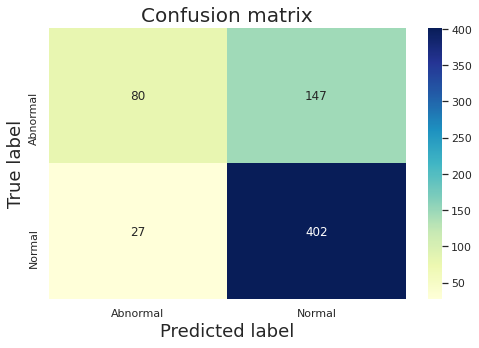

In [15]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

### ROC curve 

#### -  confusion_matrix function 

In [18]:
def confusion_matrix_all(data_train,threshold):

    #1. manage data  --------------------------------------------------------------------------------------------------------------------------------------------------

    p1 = data_train #Input table   
    act= p1['Class'].map({'Normal':0,'Abnormal':1}).values
    pred = p1['category'].map({'Normal':0,'Abnormal':1}).values

    import numpy as np
    n = len(p1)
    proplist = list()
    for i in range(0,n):
        score = p1.iloc[i].to_numpy()
        if score[13]=='Normal':
            prob = 1 - score[14]
            proplist.append(prob)
        else:
            prob = score[14]
            proplist.append(prob)


    prob_all =np.array(proplist)

#2. เงื่อนไข ---------------------------------------------------------------------------------------------------------------------------------------------
    
    import numpy as np
    from sklearn.metrics import confusion_matrix

    TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
    print(TN, FP, FN, TP)

# 3. threshold ----------------------------------------------------------------


    import numpy as np
    from sklearn.metrics import confusion_matrix
    
    t = prob_all >= threshold
    #replace
    ts =t.tolist()
    alist =list()
    for i in range(0,len(ts)):
        if ts[i]==  True:
            a = 1
            alist.append(a)
        else:
            a = 0
            alist.append(a)

    tn, fp, fn, tp = confusion_matrix(act, alist).ravel()

    print('(TN,FP,FN,TP)')
    print('(',tn,',', fp,',', fn,',', tp,')')
    return tn, fp, fn, tp


In [19]:
#Test function
threshold = 0.5
confusion_matrix_all(data_train,threshold)

402 27 147 80
(TN,FP,FN,TP)
( 402 , 27 , 147 , 80 )


(402, 27, 147, 80)

#### -  run ROC curve

In [20]:
import numpy as np
threshold = np.arange(0.0, 1.002, 0.001)
precision, recall, ACC, TPR, FPR, SPEC = list(),list(),list(),list(),list(),list()
TN0, FP0, FN0, TP0 = list(),list(),list(),list()
for i in threshold:
    precision0, recall0, ACC0, TPR0, FPR0, SPEC0 = list(),list(),list(),list(),list(),list()
    
    tn,fp,fn,tp = confusion_matrix_all(data_train,i) 
    try:
        pre = tp/(tp+fp)
        re= tp/(tp+fn)
        acc = (tp+tn)/(tp+tn+fp+fn)
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        spec = 1-(tn/(tn+fp))
    except ZeroDivisionError:
        pre,re,acc,tpr,fpr,spec =1,0,0,0,0,0      
            
    TP0.append(tp)
    TN0.append(tn)
    FP0.append(fp)
    FN0.append(fn)
    precision0.append(pre)
    recall0.append(re)
    ACC0.append(acc)
    TPR0.append(re)
    FPR0.append(fpr)       
    SPEC0.append(spec)
        
    precision.append(precision0)
    recall.append(recall0)
    ACC.append(ACC0)
    TPR.append(TPR0)
    FPR.append(FPR0)       
    SPEC.append(SPEC0)

402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )


402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 0 , 429 , 0 , 227 )


402 27 147 80
(TN,FP,FN,TP)
( 91 , 338 , 2 , 225 )
402 27 147 80
(TN,FP,FN,TP)
( 93 , 336 , 2 , 225 )
402 27 147 80
(TN,FP,FN,TP)
( 97 , 332 , 2 , 225 )
402 27 147 80
(TN,FP,FN,TP)
( 100 , 329 , 2 , 225 )
402 27 147 80
(TN,FP,FN,TP)
( 102 , 327 , 3 , 224 )
402 27 147 80
(TN,FP,FN,TP)
( 105 , 324 , 3 , 224 )
402 27 147 80
(TN,FP,FN,TP)
( 111 , 318 , 4 , 223 )
402 27 147 80
(TN,FP,FN,TP)
( 115 , 314 , 4 , 223 )
402 27 147 80
(TN,FP,FN,TP)
( 118 , 311 , 5 , 222 )
402 27 147 80
(TN,FP,FN,TP)
( 122 , 307 , 5 , 222 )
402 27 147 80
(TN,FP,FN,TP)
( 126 , 303 , 5 , 222 )
402 27 147 80
(TN,FP,FN,TP)
( 130 , 299 , 5 , 222 )
402 27 147 80
(TN,FP,FN,TP)
( 136 , 293 , 5 , 222 )
402 27 147 80
(TN,FP,FN,TP)
( 138 , 291 , 6 , 221 )
402 27 147 80
(TN,FP,FN,TP)
( 142 , 287 , 6 , 221 )
402 27 147 80
(TN,FP,FN,TP)
( 144 , 285 , 6 , 221 )
402 27 147 80
(TN,FP,FN,TP)
( 146 , 283 , 6 , 221 )
402 27 147 80
(TN,FP,FN,TP)
( 147 , 282 , 6 , 221 )
402 27 147 80
(TN,FP,FN,TP)
( 152 , 277 , 6 , 221 )
402 27 147 80
(

402 27 147 80
(TN,FP,FN,TP)
( 397 , 32 , 132 , 95 )
402 27 147 80
(TN,FP,FN,TP)
( 397 , 32 , 132 , 95 )
402 27 147 80
(TN,FP,FN,TP)
( 397 , 32 , 134 , 93 )
402 27 147 80
(TN,FP,FN,TP)
( 397 , 32 , 136 , 91 )
402 27 147 80
(TN,FP,FN,TP)
( 397 , 32 , 136 , 91 )
402 27 147 80
(TN,FP,FN,TP)
( 397 , 32 , 136 , 91 )
402 27 147 80
(TN,FP,FN,TP)
( 398 , 31 , 137 , 90 )
402 27 147 80
(TN,FP,FN,TP)
( 399 , 30 , 139 , 88 )
402 27 147 80
(TN,FP,FN,TP)
( 400 , 29 , 141 , 86 )
402 27 147 80
(TN,FP,FN,TP)
( 400 , 29 , 141 , 86 )
402 27 147 80
(TN,FP,FN,TP)
( 400 , 29 , 142 , 85 )
402 27 147 80
(TN,FP,FN,TP)
( 400 , 29 , 143 , 84 )
402 27 147 80
(TN,FP,FN,TP)
( 400 , 29 , 145 , 82 )
402 27 147 80
(TN,FP,FN,TP)
( 402 , 27 , 147 , 80 )
402 27 147 80
(TN,FP,FN,TP)
( 403 , 26 , 147 , 80 )
402 27 147 80
(TN,FP,FN,TP)
( 405 , 24 , 149 , 78 )
402 27 147 80
(TN,FP,FN,TP)
( 407 , 22 , 150 , 77 )
402 27 147 80
(TN,FP,FN,TP)
( 409 , 20 , 151 , 76 )
402 27 147 80
(TN,FP,FN,TP)
( 409 , 20 , 151 , 76 )
402 27 147 8

402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 222 , 5 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 222 , 5 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 222 , 5 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 222 , 5 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 223 , 4 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 223 , 4 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 223 , 4 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 223 , 4 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 223 , 4 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 223 , 4 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 223 , 4 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 223 , 4 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 223 , 4 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 223 , 4 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 223 , 4 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 223 , 4 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 223 , 4 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 223 , 4 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 223 , 4 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 223 , 4 )


/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


, 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 

402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )
402 27 147 80
(TN,FP,FN,TP)
( 429 , 0 , 227 , 0 )


In [21]:
#average per threshold 
precision1,recall1,ACC1,TPR1,FPR1,SPEC1 = list(),list(),list(),list(),list(),list()
from statistics import *
for m in range(0,len(precision)):
    a1 =mean(precision[m])
    a2 =mean(recall[m])
    a3 =mean(ACC[m])
    a4 =mean(TPR[m])
    a5 =mean(FPR[m])
    a6 =mean(SPEC[m])
    
    precision1.append(a1)
    recall1.append(a2)
    ACC1.append(a3)
    TPR1.append(a4)
    FPR1.append(a5)       
    SPEC1.append(a6)   

In [22]:
#create dataframe
import numpy as np
i = np.arange(len(precision1)) # index for df
roc0 = pd.DataFrame({'Threshold' : pd.Series(threshold, index=i),'Precision' : pd.Series(precision1, index = i),'Recall' : pd.Series(recall1, index = i),
                     'tpr' : pd.Series(TPR1, index = i),'fpr' : pd.Series(FPR1, index = i),'1-Spec' : pd.Series(SPEC1, index = i),  'ACC' : pd.Series(ACC1, index = i), 
                     'TN' : pd.Series(TN0, index = i), 'FP' : pd.Series(FP0, index = i), 'FN' : pd.Series(FN0, index = i), 'TP' : pd.Series(TP0, index = i)},)
roc0 = roc0.fillna(1)

In [23]:
roc0.head(10)

,Threshold,Precision,Recall,tpr,fpr,1-Spec,ACC,TN,FP,FN,TP
0,0.000,0.346037,1.0,1.0,1.0,1.0,0.346037,0,429,0,227
1,0.001,0.346037,1.0,1.0,1.0,1.0,0.346037,0,429,0,227
2,0.002,0.346037,1.0,1.0,1.0,1.0,0.346037,0,429,0,227
3,0.003,0.346037,1.0,1.0,1.0,1.0,0.346037,0,429,0,227
4,0.004,0.346037,1.0,1.0,1.0,1.0,0.346037,0,429,0,227
5,0.005,0.346037,1.0,1.0,1.0,1.0,0.346037,0,429,0,227
6,0.006,0.346037,1.0,1.0,1.0,1.0,0.346037,0,429,0,227
7,0.007,0.346037,1.0,1.0,1.0,1.0,0.346037,0,429,0,227
8,0.008,0.346037,1.0,1.0,1.0,1.0,0.346037,0,429,0,227
9,0.009,0.346037,1.0,1.0,1.0,1.0,0.346037,0,429,0,227


#### -  sen VS spec

No handles with labels found to put in legend.


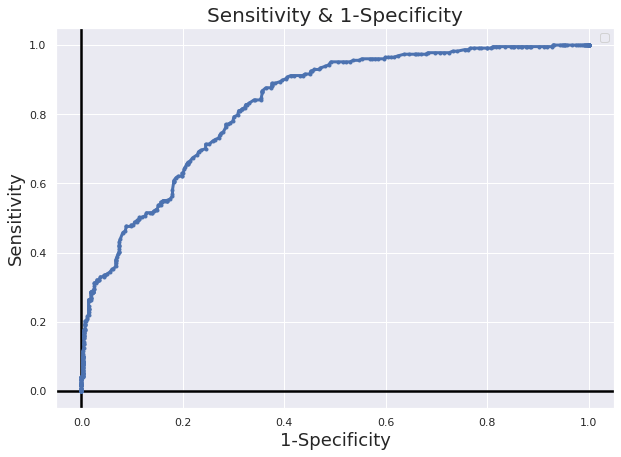

PR AUC (area = 0.83)


In [24]:
#sen VS spec
import numpy as np
import matplotlib.pyplot as plt
sen= np.array(roc0['tpr'])
spec = np.array(roc0['1-Spec'])
# from matplotlib import pyplot
lw = 3
fig, ax = plt.subplots(figsize=(10, 7))
plt.axhline(0, lw=2.5, color='black')
plt.axvline(0, lw=2.5, color='black')
plt.plot([0, 0],[1, 1],'c', linestyle='--',lw=2.5)
plt.plot(spec,sen,'b', marker='.',lw=lw)  
    # axis labels
plt.xlabel('1-Specificity',fontsize=18)
plt.ylabel('Sensitivity',fontsize=18)
plt.title('Sensitivity & 1-Specificity',fontsize=20)
    # show the legend
plt.legend()
    # show the plot
plt.show()
    # calculate the precision-recall auc
from sklearn.metrics import auc
auc_score = auc(spec, sen)
print('PR AUC (area = %0.2f)' % (auc_score))

#### -  Precision & Recall Curve

No handles with labels found to put in legend.


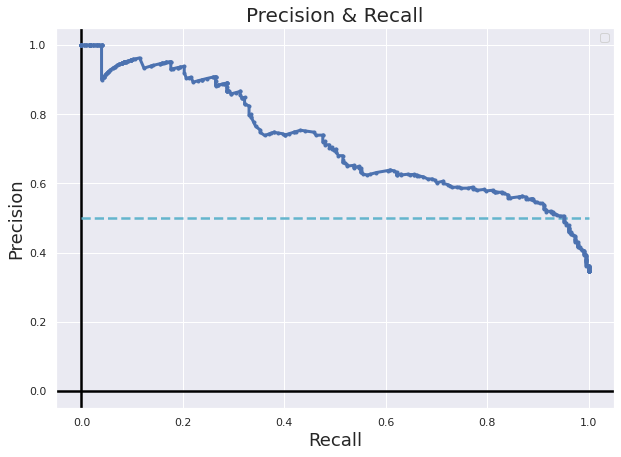

PR AUC (area = 0.72)


In [25]:
#Precision & Recall Curve
import numpy as np
recall = np.array(roc0['Recall'])
precision = np.array(roc0['Precision'])

import matplotlib.pyplot as plt
from matplotlib import pyplot
lw = 3
fig, ax = plt.subplots(figsize=(10, 7))
plt.axhline(0, lw=2.5, color='black')
plt.axvline(0, lw=2.5, color='black')
fig.patch.set_facecolor('w')
plt.plot([0, 1], [0.5, 0.5],'c', linestyle='--',lw=2.5)
pyplot.plot(recall, precision,'b', marker='.', lw=lw)
    # axis labels
pyplot.xlabel('Recall',fontsize=18)
pyplot.ylabel('Precision',fontsize=18)
pyplot.title('Precision & Recall',fontsize=20)
    # show the legend
pyplot.legend()
    # show the plot
pyplot.show()
    # calculate the precision-recall auc
from sklearn.metrics import auc
auc_score = auc(recall, precision)
print('PR AUC (area = %0.2f)' % (auc_score))

# Threshold

In [26]:
#Select the best threshold
FN_min = roc0[roc0.FN == roc0.FN.min()]
FP_min = FN_min[FN_min.FP == FN_min.FP.min()]
FP_min

,Threshold,Precision,Recall,tpr,fpr,1-Spec,ACC,TN,FP,FN,TP
306,0.306,0.36262,1.0,1.0,0.93007,0.93007,0.391768,30,399,0,227
307,0.307,0.36262,1.0,1.0,0.93007,0.93007,0.391768,30,399,0,227


In [27]:
import numpy as np
# threshold = np.arange(0.0, 1.002, 0.001)
threshold = np.arange(0.3, 0.31, 0.00001)
precision, recall, ACC, TPR, FPR, SPEC = list(),list(),list(),list(),list(),list()
TN0, FP0, FN0, TP0 = list(),list(),list(),list()
for i in threshold:
    precision0, recall0, ACC0, TPR0, FPR0, SPEC0 = list(),list(),list(),list(),list(),list()
    
    tn,fp,fn,tp = confusion_matrix_all(data_train,i) 
    try:
        pre = tp/(tp+fp)
        re= tp/(tp+fn)
        acc = (tp+tn)/(tp+tn+fp+fn)
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        spec = 1-(tn/(tn+fp))
    except ZeroDivisionError:
        pre,re,acc,tpr,fpr,spec =1,0,0,0,0,0      
            
    TP0.append(tp)
    TN0.append(tn)
    FP0.append(fp)
    FN0.append(fn)
    precision0.append(pre)
    recall0.append(re)
    ACC0.append(acc)
    TPR0.append(re)
    FPR0.append(fpr)       
    SPEC0.append(spec)
        
    precision.append(precision0)
    recall.append(recall0)
    ACC.append(ACC0)
    TPR.append(TPR0)
    FPR.append(FPR0)       
    SPEC.append(SPEC0)

402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 20 , 409 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 2

402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 21 , 408 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 2

( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 24 , 405 , 0 , 227 )
402 27 1

402 27 147 80
(TN,FP,FN,TP)
( 28 , 401 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 28 , 401 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 28 , 401 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 28 , 401 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 28 , 401 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 29 , 400 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 29 , 400 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 29 , 400 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 29 , 400 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 29 , 400 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 29 , 400 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 29 , 400 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 29 , 400 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 29 , 400 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 29 , 400 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 29 , 400 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 29 , 400 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 29 , 400 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 29 , 400 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 2

402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )
402 27 147 80
(TN,FP,FN,TP)
( 3

402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 31 , 398 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 3

402 27 147 80
(TN,FP,FN,TP)
( 37 , 392 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 37 , 392 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 37 , 392 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 37 , 392 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 37 , 392 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 37 , 392 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 37 , 392 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 37 , 392 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 37 , 392 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 37 , 392 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 37 , 392 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 37 , 392 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 38 , 391 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 38 , 391 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 38 , 391 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 38 , 391 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 38 , 391 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 38 , 391 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 38 , 391 , 1 , 226 )
402 27 147 80
(TN,FP,FN,TP)
( 3

In [28]:
#average per threshold 
precision1,recall1,ACC1,TPR1,FPR1,SPEC1 = list(),list(),list(),list(),list(),list()
from statistics import *
for m in range(0,len(precision)):
    a1 =mean(precision[m])
    a2 =mean(recall[m])
    a3 =mean(ACC[m])
    a4 =mean(TPR[m])
    a5 =mean(FPR[m])
    a6 =mean(SPEC[m])
    
    precision1.append(a1)
    recall1.append(a2)
    ACC1.append(a3)
    TPR1.append(a4)
    FPR1.append(a5)       
    SPEC1.append(a6)   

In [29]:
#create dataframe
import numpy as np
i = np.arange(len(precision1)) # index for df
roc0 = pd.DataFrame({'Threshold' : pd.Series(threshold, index=i),'Precision' : pd.Series(precision1, index = i),'Recall' : pd.Series(recall1, index = i),
                     'tpr' : pd.Series(TPR1, index = i),'fpr' : pd.Series(FPR1, index = i),'1-Spec' : pd.Series(SPEC1, index = i),  'ACC' : pd.Series(ACC1, index = i), 
                     'TN' : pd.Series(TN0, index = i), 'FP' : pd.Series(FP0, index = i), 'FN' : pd.Series(FN0, index = i), 'TP' : pd.Series(TP0, index = i)},)
roc0 = roc0.fillna(1)

In [30]:
#Select the best threshold
FN_min = roc0[roc0.FN == roc0.FN.min()]
FP_min = FN_min[FN_min.FP == FN_min.FP.min()]
FP_min

,Threshold,Precision,Recall,tpr,fpr,1-Spec,ACC,TN,FP,FN,TP
519,0.30519,0.36262,1.0,1.0,0.93007,0.93007,0.391768,30,399,0,227
520,0.30520,0.36262,1.0,1.0,0.93007,0.93007,0.391768,30,399,0,227
521,0.30521,0.36262,1.0,1.0,0.93007,0.93007,0.391768,30,399,0,227
522,0.30522,0.36262,1.0,1.0,0.93007,0.93007,0.391768,30,399,0,227
523,0.30523,0.36262,1.0,1.0,0.93007,0.93007,0.391768,30,399,0,227
...,...,...,...,...,...,...,...,...,...,...,...
744,0.30744,0.36262,1.0,1.0,0.93007,0.93007,0.391768,30,399,0,227
745,0.30745,0.36262,1.0,1.0,0.93007,0.93007,0.391768,30,399,0,227
746,0.30746,0.36262,1.0,1.0,0.93007,0.93007,0.391768,30,399,0,227
747,0.30747,0.36262,1.0,1.0,0.93007,0.93007,0.391768,30,399,0,227


In [31]:
threshold = FP_min['Threshold'].tolist()[0]
threshold
# threshold = 0.12828

0.3051900000000052

In [32]:


    #1. manage data  --------------------------------------------------------------------------------------------------------------------------------------------------

    p1 = data_train #Input table   
    act= p1['Class'].map({'Normal':0,'Abnormal':1}).values
    pred = p1['category'].map({'Normal':0,'Abnormal':1}).values

    import numpy as np
    n = len(p1)
    proplist = list()
    for i in range(0,n):
        score = p1.iloc[i].to_numpy()
        if score[13]=='Normal':
            prob = 1 - score[14]
            proplist.append(prob)
        else:
            prob = score[14]
            proplist.append(prob)


    prob_all =np.array(proplist)

#2. เงื่อนไข ---------------------------------------------------------------------------------------------------------------------------------------------
    
    import numpy as np
    from sklearn.metrics import confusion_matrix

    TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
    print(TN, FP, FN, TP)

# 3. threshold ----------------------------------------------------------------


    import numpy as np
    from sklearn.metrics import confusion_matrix
    
    t = prob_all >= threshold
    #replace
    ts =t.tolist()
    alist =list()
    for i in range(0,len(ts)):
        if ts[i]==  True:
            a = 1
            alist.append(a)
        else:
            a = 0
            alist.append(a)

    tn, fp, fn, tp = confusion_matrix(act, alist).ravel()

    print('(TN,FP,FN,TP)')
    print('(',tn,',', fp,',', fn,',', tp,')')



402 27 147 80
(TN,FP,FN,TP)
( 30 , 399 , 0 , 227 )


In [33]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
# confusion_matrix(act, pred)
print(classification_report(act, alist))#performance

              precision    recall  f1-score   support

           0       1.00      0.07      0.13       429
           1       0.36      1.00      0.53       227

    accuracy                           0.39       656
   macro avg       0.68      0.53      0.33       656
weighted avg       0.78      0.39      0.27       656



# Grad CAM

### - create dataframe for Grad CAM 

In [20]:
#สร้าง folder เก็บรูป 
import os
import shutil

path0 = "/media/tohn/SSD/image/test_GradCam/B1_val" 

try:
    os.mkdir(path0)
except OSError:
    shutil.rmtree(path0)
    os.mkdir(path0)

In [21]:
#สร้าง folder เก็บรูป 
import os
import shutil

path1 = path0+'/abn_correct/'
path2 = path0+'/abn_missing/'
path3 = path0+'/Nor_correct/'
path4 = path0+'/Nor_missing/'
try:
    os.mkdir(path1)
    os.mkdir(path2)
    os.mkdir(path3)
    os.mkdir(path4)
except OSError:
    shutil.rmtree(path1)
    shutil.rmtree(path2)
    shutil.rmtree(path3)
    shutil.rmtree(path4)
    os.mkdir(path1)
    os.mkdir(path2)
    os.mkdir(path3)
    os.mkdir(path4)

### - Abnormal 

In [22]:
#load image function
def load_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    return x,img

In [23]:
df = dataframe
abnormal  = df[df['Class']=='Abnormal']
ab_correct = abnormal[abnormal['Class']==abnormal['category']] # correct
ab_wrong = abnormal[abnormal['Class']!=abnormal['category']]
#select position 
print('abnormal:',len(abnormal))
print('ab_correct:',len(ab_correct))
print('ab_wrong:',len(ab_wrong))
print(len(set(ab_correct['Sub Position'])))
print(set(ab_correct['Sub Position']))

abnormal: 290
ab_correct: 261
ab_wrong: 29
11
{'P51', 'P41', 'P31', 'P72', 'P42', 'P52', 'P2', 'P1', 'P61', 'P62', 'P71'}


####  ab_correct 

##### TF-explain 

In [24]:
#### load only max &min prob of each views(P1,P2,P31,...,P72) *** For correct
max_df = list()
min_df = list()
classs = list(set(ab_correct['Sub Position']))
for i in classs:
    posi = ab_correct[ab_correct['Sub Position'] == i]
    #max
    max_prob = posi[posi['Prob'] == posi['Prob'].max()][0:1].reset_index()
    SubPosi = i
    case = 'ab_correct'
    case_prob = 'Max'
    prob = max_prob['Prob'].tolist()[0]
    path = max_prob['Path Crop'].tolist()[0]

    max_df.append({'Sub Position':SubPosi,'Case':case,'Case_prob':case_prob,'Prob':prob,'Path':path})
    
    #min
    min_prob = posi[posi['Prob'] == posi['Prob'].min()][0:1].reset_index()
    SubPosi = i
    case = 'ab_correct'
    case_prob = 'Min'
    prob = min_prob['Prob'].tolist()[0]
    path = min_prob['Path Crop'].tolist()[0]

    min_df.append({'Sub Position':SubPosi,'Case':case,'Case_prob':case_prob,'Prob':prob,'Path':path})
tabktdf = pd.DataFrame(max_df+min_df)
tabktdf

,Sub Position,Case,Case_prob,Prob,Path
0,P51,ab_correct,Max,0.941443,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...
1,P41,ab_correct,Max,0.943320,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...
2,P31,ab_correct,Max,0.943824,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...
3,P72,ab_correct,Max,0.866244,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...
4,P42,ab_correct,Max,0.969776,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...
5,P52,ab_correct,Max,0.955517,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...
6,P2,ab_correct,Max,0.944008,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...
7,P1,ab_correct,Max,0.946297,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...
8,P61,ab_correct,Max,0.907034,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...
9,P62,ab_correct,Max,0.905729,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...


In [25]:
img_paths = tabktdf['Path'].tolist()
case = tabktdf['Case_prob'].tolist()
prob = tabktdf['Prob'].round(4).tolist()
imlist = list()
idx = range(0,len(img_paths))
for i in idx :
    j = img_paths[i]
    imlist.append(j)
    j = j.split('/')[-1]
    os.chdir(path1)
    import cv2
    from matplotlib import pyplot as plt
    from tf_explain.core.grad_cam import GradCAM
    explainer = GradCAM()

    img,ori = load_image(img_paths[i])
    data = (img, None)

    grid = explainer.explain(data, model, class_index=0)
    
    explainer.save(grid,'.',"ab_cor_"+str(i)+"_"+str(case[i])+"_"+str(prob[i])+"_"+str(j)+".png")
print(len(imlist))

22


##### Load USAI image 

In [26]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
# load the image
idx = imlist
for i in idx :
    j = i
    j = j.split('/')[-1]
    img = image.load_img(i)
    os.chdir(path1)
    save_img(str(j)+'.png', img)
print(len(imlist))

Using TensorFlow backend.


22


####  ab_wrong

In [27]:
print('nor_wrong:',len(ab_wrong))
w_img_paths = ab_wrong['Path Crop'].tolist()
w_prob = ab_wrong['Prob'].round(4).tolist()
ab_wrong.shape

nor_wrong: 29


(29, 12)

In [28]:
imlist = list()
idx = range(0,len(w_img_paths))
for i in idx :
    j = w_img_paths[i]
    imlist.append(j)
    j = j.split('/')[-1]
#     print(j)
    os.chdir(path2)
    import cv2
    from matplotlib import pyplot as plt
    from tf_explain.core.grad_cam import GradCAM
    explainer = GradCAM()

    img,ori = load_image(w_img_paths[i])
    data = (img, None)

    grid = explainer.explain(data, model, class_index=0) 
    explainer.save(grid,'.',"Nor_missing_"+str(w_prob[i])+"_"+str(j)+"_"+str(i)+".png")
print(len(imlist))

29


#####  Load USAI image

In [29]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
idx = imlist
for i in idx :
    j = i
    j = j.split('/')[-1]
    img = image.load_img(i)
    os.chdir(path2)
    save_img(str(j)+'.png', img)
print(len(imlist))

29


#### *Show Correct Abnormal GradCam*

/media/tohn/HDD/VISION_dataset/USAI/ABnormal01/1 ABNORMAL/cropped/AB01 P5-1 C007.JPG


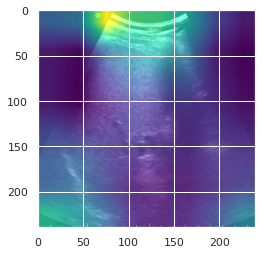

In [30]:
from tf_explain.core.grad_cam import GradCAM
explainer = GradCAM()
img,ori = load_image(img_paths[0])
data = (img, None)
grid = explainer.explain(data, model, class_index=1) 
explainer.save(grid, ".", "grad_cam.png")
print(img_paths[0])
plt.imshow(grid)

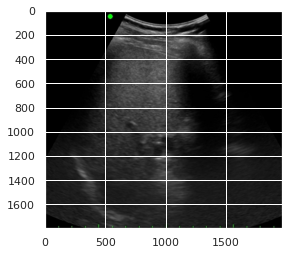

In [31]:
import matplotlib.image as mpimg
img = mpimg.imread(img_paths[0])
plt.imshow(img)

#### *Show Miss Abnormal GradCam*

/media/tohn/HDD/VISION_dataset/USAI/ABnormal01/1 ABNORMAL/cropped/AB01 P5-1 C007.JPG


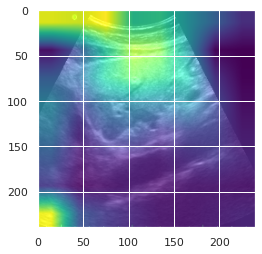

In [32]:
from tf_explain.core.grad_cam import GradCAM
explainer = GradCAM()
img,ori = load_image(w_img_paths[0])
data = (img, None)
grid = explainer.explain(data, model, class_index=1) 
explainer.save(grid, ".", "grad_cam.png")
print(img_paths[0])
plt.imshow(grid)

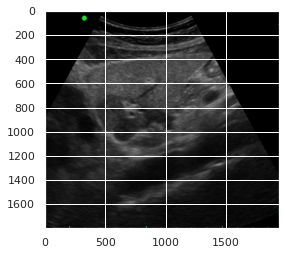

In [33]:
import matplotlib.image as mpimg
img = mpimg.imread(w_img_paths[0])
plt.imshow(img)

### Normal

In [34]:
df = dataframe
normal  = df[df['Class']=='Normal']
nor_correct = normal[normal['Class']==normal['category']] # correct
nor_wrong = normal[normal['Class']!=normal['category']]
print('normal:',len(normal))
print('nor_correct:',len(nor_correct))
print('nor_wrong:',len(nor_wrong))
#select position 
print(len(set(nor_correct['Sub Position'])))
print(set(nor_correct['Sub Position']))

normal: 115
nor_correct: 102
nor_wrong: 13
12
{'P41', 'P51', 'P31', 'P72', 'P42', 'P52', 'P2', 'P1', 'P61', 'P32', 'P62', 'P71'}


#### nor_correct 

##### TF-explain

In [35]:
#### load only max &min prob of each views(P1,P2,P31,...,P72) *** For correct
max_df = list()
min_df = list()
classs = list(set(nor_correct['Sub Position']))
for i in classs:
    posi = nor_correct[nor_correct['Sub Position'] == i]
    #max
    max_prob = posi[posi['Prob'] == posi['Prob'].max()][0:1].reset_index()
    SubPosi = i
    case = 'nor_correct'
    case_prob = 'Max'
    prob = max_prob['Prob'].tolist()[0]
    path = max_prob['Path Crop'].tolist()[0]

    max_df.append({'Sub Position':SubPosi,'Case':case,'Case_prob':case_prob,'Prob':prob,'Path':path})
    
    #min
    min_prob = posi[posi['Prob'] == posi['Prob'].min()][0:1].reset_index()
    SubPosi = i
    case = 'nor_correct'
    case_prob = 'Min'
    prob = min_prob['Prob'].tolist()[0]
    path = min_prob['Path Crop'].tolist()[0]

    min_df.append({'Sub Position':SubPosi,'Case':case,'Case_prob':case_prob,'Prob':prob,'Path':path})
tabktdf = pd.DataFrame(max_df+min_df)
tabktdf

,Sub Position,Case,Case_prob,Prob,Path
0,P41,nor_correct,Max,0.990074,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
1,P51,nor_correct,Max,0.977773,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
2,P31,nor_correct,Max,0.979318,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
3,P72,nor_correct,Max,0.957400,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
4,P42,nor_correct,Max,0.987315,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
5,P52,nor_correct,Max,0.969509,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
6,P2,nor_correct,Max,0.965804,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
7,P1,nor_correct,Max,0.969570,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
8,P61,nor_correct,Max,0.954264,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
9,P32,nor_correct,Max,0.866419,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...


In [36]:
#Load Grad Cam image

img_paths = tabktdf['Path'].tolist()
case = tabktdf['Case_prob'].tolist()
prob = tabktdf['Prob'].round(4).tolist()

imlist = list()
idx = range(0,len(img_paths))
for i in idx :
    j = img_paths[i]
    imlist.append(j)
    j = j.split('/')[-1]
    os.chdir(path3)
    import cv2
    from matplotlib import pyplot as plt
    from tf_explain.core.grad_cam import GradCAM
    explainer = GradCAM()

    img,ori = load_image(img_paths[i])
    data = (img, None)

    grid = explainer.explain(data, model, class_index=0) 
    explainer.save(grid,'.',"nor_cor_"+str(i)+"_"+str(case[i])+"_"+str(prob[i])+"_"+str(j)+".png")
print(len(imlist))

24


#####  Load USAI image

In [37]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
# load the image
idx = imlist
for i in idx :
    j = i
    j = j.split('/')[-1]
    img = image.load_img(i)
    os.chdir(path3)
    save_img(str(j)+'.png', img)
print(len(imlist))

24


#### Normal Miss

In [38]:
print('nor_wrong:',len(nor_wrong))

nor_wrong: 13


In [39]:
w_img_paths = nor_wrong['Path Crop'].tolist()
w_prob = nor_wrong['Prob'].round(4).tolist()
nor_wrong.shape

(13, 12)

In [40]:
imlist = list()
idx = range(0,len(w_img_paths))
for i in idx :
    j = w_img_paths[i]
    imlist.append(j)
    j = j.split('/')[-1]
#     print(j)
    os.chdir(path4)
    import cv2
    from matplotlib import pyplot as plt
    from tf_explain.core.grad_cam import GradCAM
    explainer = GradCAM()

    img,ori = load_image(w_img_paths[i])
    data = (img, None)

    grid = explainer.explain(data, model, class_index=0) 
    explainer.save(grid,'.',"Nor_missing_"+str(w_prob[i])+"_"+str(j)+"_"+str(i)+".png")
print(len(imlist))

13


##### Load USAI image 

In [41]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
idx = imlist
for i in idx :
    j = i
    j = j.split('/')[-1]
    img = image.load_img(i)
    os.chdir(path4)
    save_img(str(j)+'.png', img)
print(len(imlist))

13


##### *Show Correct NormalGradCam*

/media/tohn/HDD/VISION_dataset/USAI/Prelim. Imgs/P4/Test/cropped/P4_Case_008-1.jpg


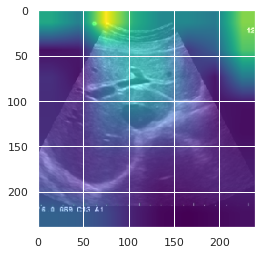

In [42]:
from tf_explain.core.grad_cam import GradCAM
explainer = GradCAM()
img,ori = load_image(img_paths[0])
data = (img, None)
grid = explainer.explain(data, model, class_index=1) 
explainer.save(grid, ".", "grad_cam.png")
print(img_paths[0])
plt.imshow(grid)

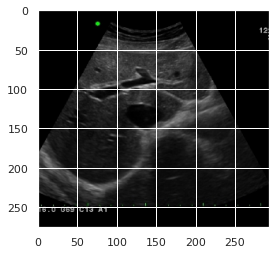

In [43]:
img = mpimg.imread(img_paths[0])
plt.imshow(img)

##### *Show Miss Normal GradCam*

/media/tohn/HDD/VISION_dataset/USAI/Prelim. Imgs/P4/Test/cropped/P4_Case_008-1.jpg


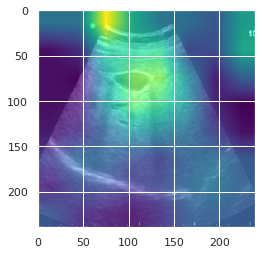

In [44]:
from tf_explain.core.grad_cam import GradCAM
explainer = GradCAM()
img,ori = load_image(w_img_paths[0])
data = (img, None)
grid = explainer.explain(data, model, class_index=1) 
explainer.save(grid, ".", "grad_cam.png")
print(img_paths[0])
plt.imshow(grid)

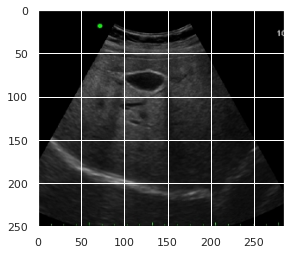

In [45]:
img = mpimg.imread(w_img_paths[0])
plt.imshow(img)